# Linear regression

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

In this notebook, we will implement linear regression using gradient descent.

## 1. Hypothesis function

The hypothesis function for linear regression is defined as:

$$h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$$

where $\theta_0, \theta_1, \ldots, \theta_n$ are the parameters of the model.

## 2. Cost function

The cost function for linear regression is defined as:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$$

where $m$ is the number of training examples.

A partial derivative of the cost function with respect to the $j$-th parameter is:

\begin{align*}
\frac{\partial J(\theta)}{\partial \theta_j} & = \frac{1}{2m} \sum_{i=1}^{m} \frac{\partial}{\partial \theta_j} (h_{\theta}(x^{(i)}) - y^{(i)})^2 \\ 
& = \frac{1}{2m} \sum_{i=1}^{m} 2 (h_{\theta}(x^{(i)}) - y^{(i)}) \frac{\partial}{\partial \theta_j} (h_{\theta}(x^{(i)})) \\
& = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)}
\end{align*}

where $x_j^{(i)}$ is the $j$-th feature of the $i$-th training example.

## 3. Gradient descent

The gradient descent algorithm is used to minimize the cost function. The update rule for the parameters is:

$$\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

where $\alpha$ is the learning rate.



## 4. Implementation

Let's implement linear regression using gradient descent in Python.

First, we need to import the required libraries.

In [49]:
import numpy as np
import matplotlib.pyplot as plt

Next, we will define a couple of methods to calculate the cost function and to perform gradient descent.

In [50]:
def cost_function(X: np.array, y: np.array, theta: np.array) -> float:
    m = y.size
    J = 0
    for i in range(m):
        h = X[i].dot(theta)
        J += (h - y[i]) ** 2
    return J / (2 * m)

def gradient_descent(X: np.array, y: np.array, theta: np.array, alpha: float, num_iters: int) -> tuple:
    m = y.size
    J_history = np.array([], dtype=float)
    for iter in range(num_iters):
        theta_arr = np.zeros((theta.size, 1))
        
        for j in range(m):
            h = X[j].dot(theta)
            for k in range(theta.size):
                theta_arr[k] += (h - y[j]) * X[j, k]
        
        theta -= alpha / m * theta_arr
        J_history = np.append(J_history, cost_function(X, y, theta))

        if J_history.size > 1 and np.abs(J_history[-1] - J_history[-2]) < 1e-6:
            break

    return theta, J_history, iter

Now, we will generate some random data and use the implemented linear regression to fit the data.

Finally, we will plot the data and the linear regression line.

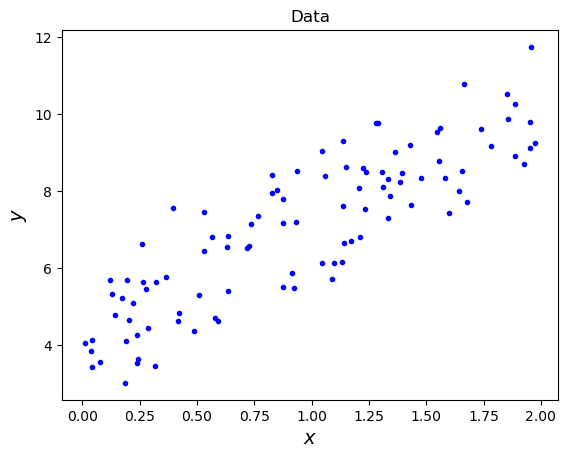

In [51]:
# generate some data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# plot the data
plt.plot(X, y, 'b.')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.title('Data')
plt.show()

Fit a linear regression model to the data using the gradient descent function.

In [52]:
alpha = 0.1
num_iters = 1000
theta = np.random.randn(2, 1)

# add a column of ones to X (intercept term, x_0)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

theta, J_history, iterations = gradient_descent(X_b, y, theta, alpha, num_iters)

print('theta:', theta)

theta: [[4.20763769]
 [2.98134567]]


Plot the data and the linear regression line.

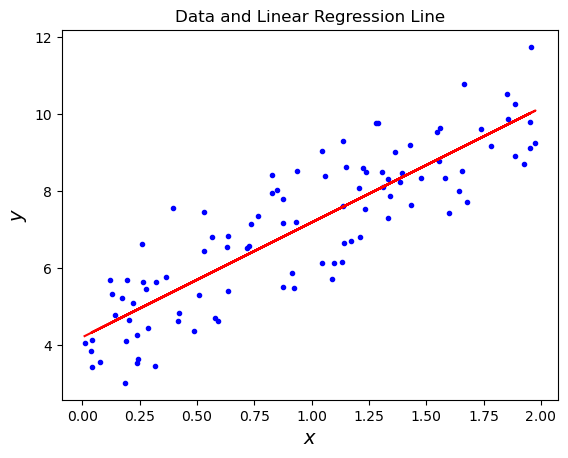

In [53]:
plt.plot(X, y, 'b.')
plt.plot(X, X_b.dot(theta), 'r-')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.title('Data and Linear Regression Line')
plt.show()

Cost function plot for each iteration.

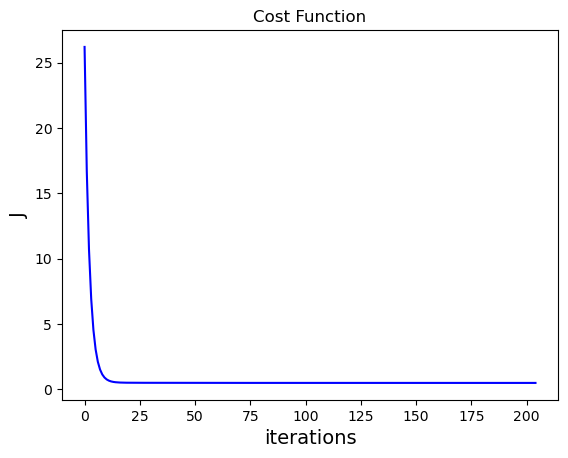

In [57]:
plt.plot(np.arange(iterations + 1), J_history, 'b-')
plt.xlabel('iterations', fontsize=14)
plt.ylabel('J', fontsize=14)
plt.title('Cost Function')
plt.show()